In [2]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("C:\\Datasets\\sonar_dataset.csv",header=None)
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
151,0.0231,0.0315,0.017,0.0226,0.041,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [18]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

X.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
101,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0302,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0310,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018


In [20]:
y.sample()

203    M
Name: 60, dtype: object

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Correlation of Sonar Data'}>

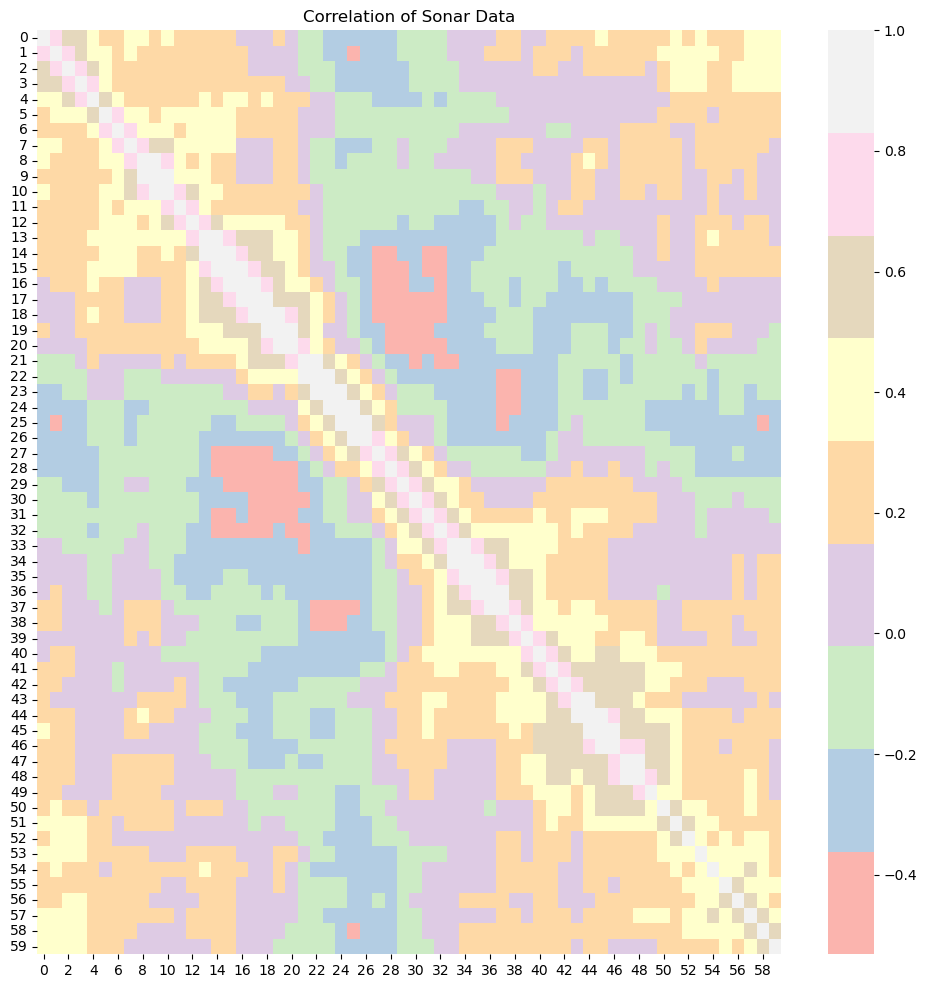

In [30]:
corr = X.corr()
plt.figure(figsize=(12,12))
plt.title("Correlation of Sonar Data")
sns.heatmap(corr, cmap=plt.cm.Pastel1)

- Some intresting Pattern

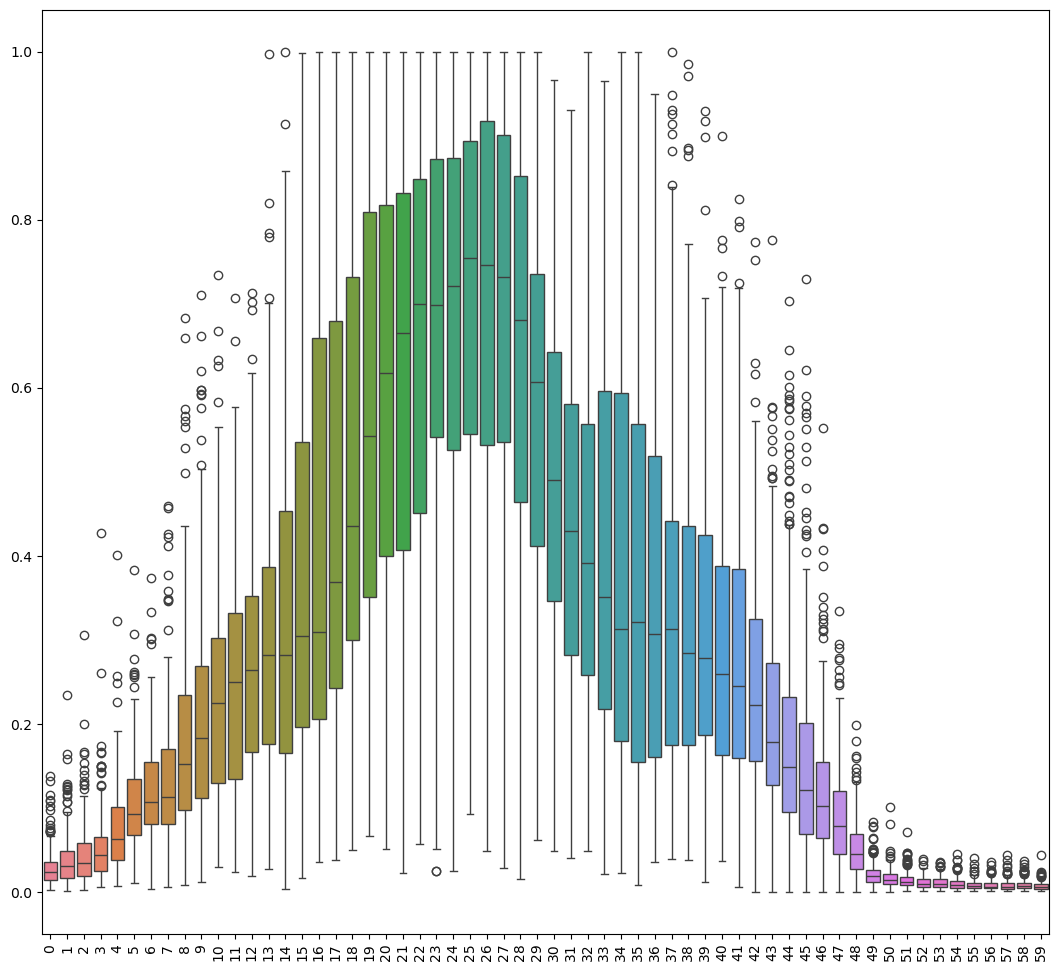

In [37]:
plt.figure(figsize=(13,12))
sns.boxplot(X)
plt.xticks(rotation=90)
plt.show()

In [47]:
# Removing Outliers
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.20) 
    Q3 = df.quantile(0.80) 
    IQR = Q3 - Q1 
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] 
    return df_clean
    

In [49]:
X.shape

(208, 60)

In [51]:
X_new = remove_outliers_iqr(X)
X_new.shape

(160, 60)

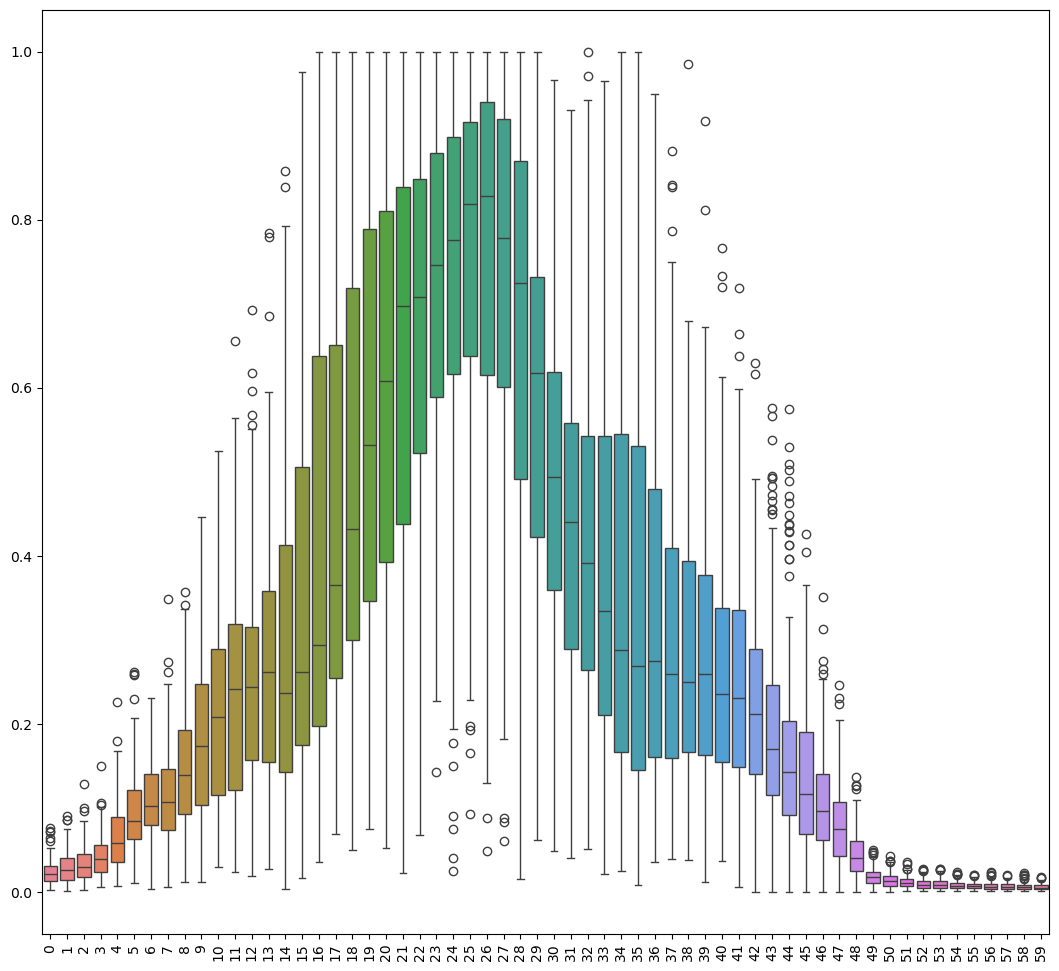

In [53]:
plt.figure(figsize=(13,12))
sns.boxplot(X_new)
plt.xticks(rotation=90)
plt.show()

In [55]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Apply RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
label = LabelEncoder()
y_new = label.fit_transform(y)
                               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.78      0.88      0.82        16

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [57]:
from sklearn.preprocessing import StandardScaler
# Apply RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
label = LabelEncoder()
y_new = label.fit_transform(y)
                               

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.78      0.88      0.82        16

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

